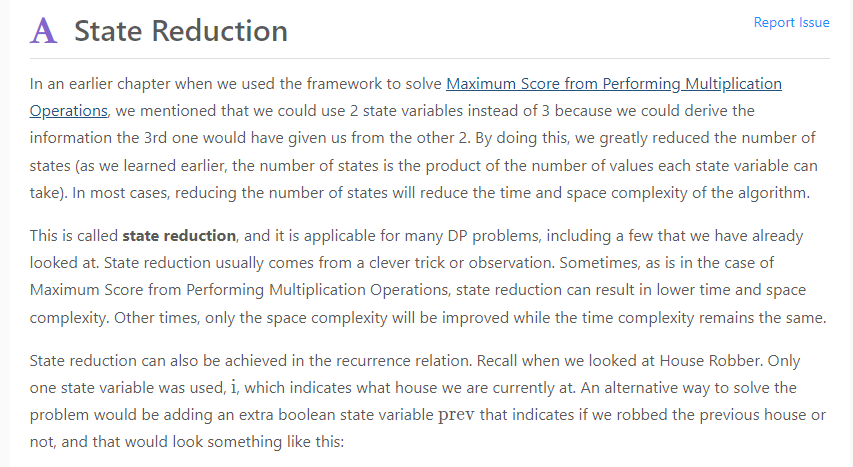

In [ ]:
# House Robber
class Solution:
    def rob(self, nums: List[int]) -> int:
        @cache
        def dp(i, prev):
            if i < 0:
                return 0
            ans = dp(i - 1, False)
            if not prev:
                ans = max(ans, dp(i - 1, True) + nums[i])
                
            return ans
        
        return dp(len(nums) - 1, False)

In [ ]:
# Fibonacci
class Solution:
    def fib(self, n: int) -> int:
        if n <= 1: return n
        one_back = 1
        two_back = 0
        for i in range(2, n + 1):
            temp = one_back
            one_back += two_back
            two_back = temp

        return one_back

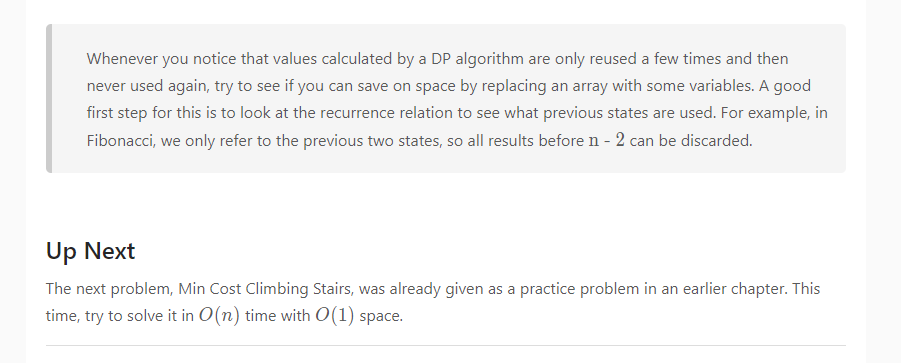

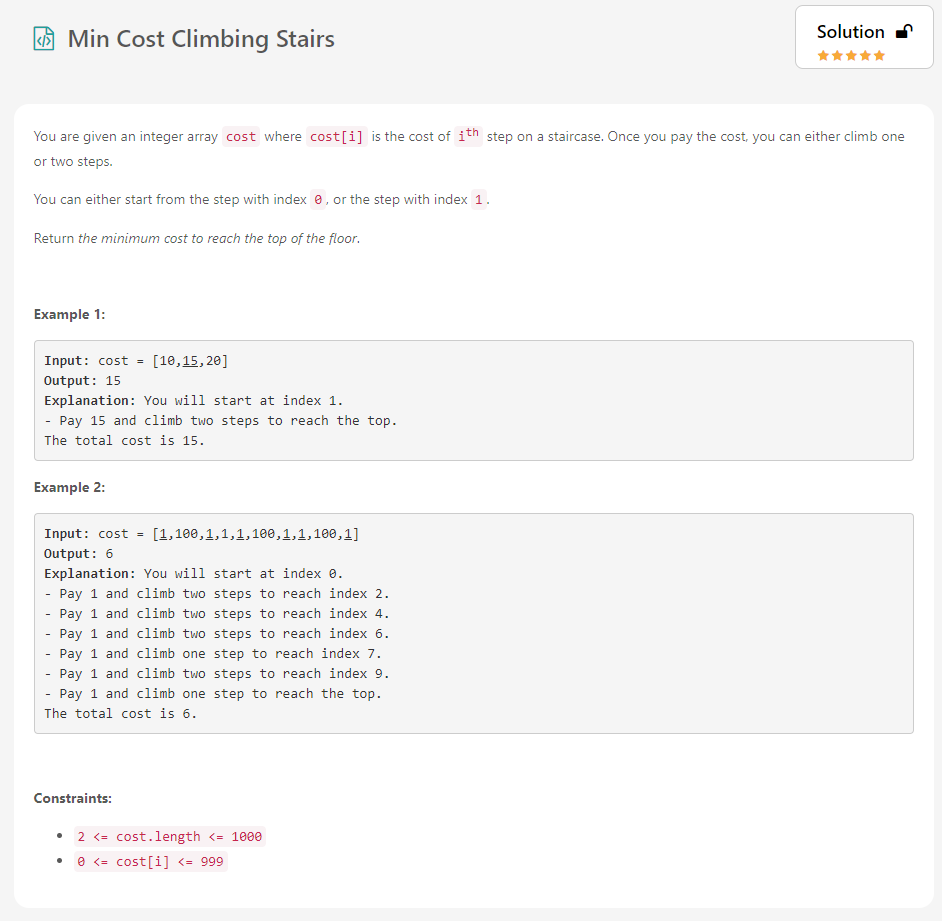

In [ ]:
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        def dp(i):
            # Base cases
            if i <= 1: 
                return 0                       
            if i not in memo:
                memo[i] = min(dp(i - 1) + cost[i-1], dp(i - 2) + cost[i-2]) # Recurrence relation
            return memo[i]
        
        memo = {}
        return dp(len(cost))

In [ ]:
#
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        # The array's length should be 1 longer than the length of cost
        # This is because we can treat the "top floor" as a step to reach
        minimum_cost = [0] * (len(cost) + 1)
        
        # Start iteration from step 2, since the minimum cost of reaching
        # step 0 and step 1 is 0
        for i in range(2, len(cost) + 1):
            take_one_step = minimum_cost[i - 1] + cost[i - 1]
            take_two_steps = minimum_cost[i - 2] + cost[i - 2]
            minimum_cost[i] = min(take_one_step, take_two_steps)

        # The final element in minimum_cost refers to the top floor
        return minimum_cost[-1]

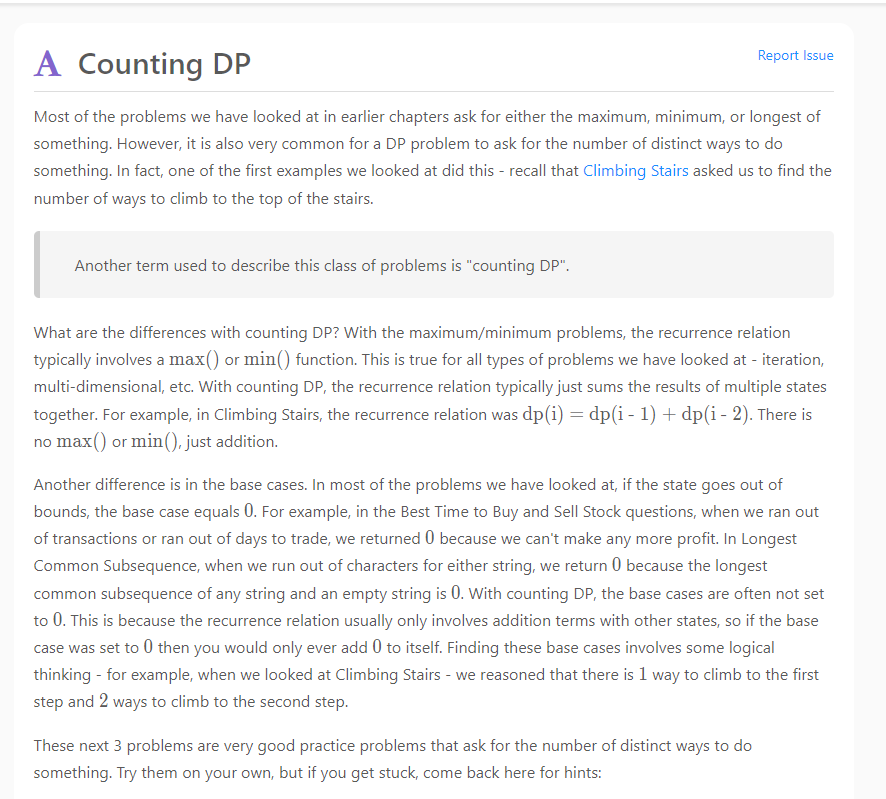

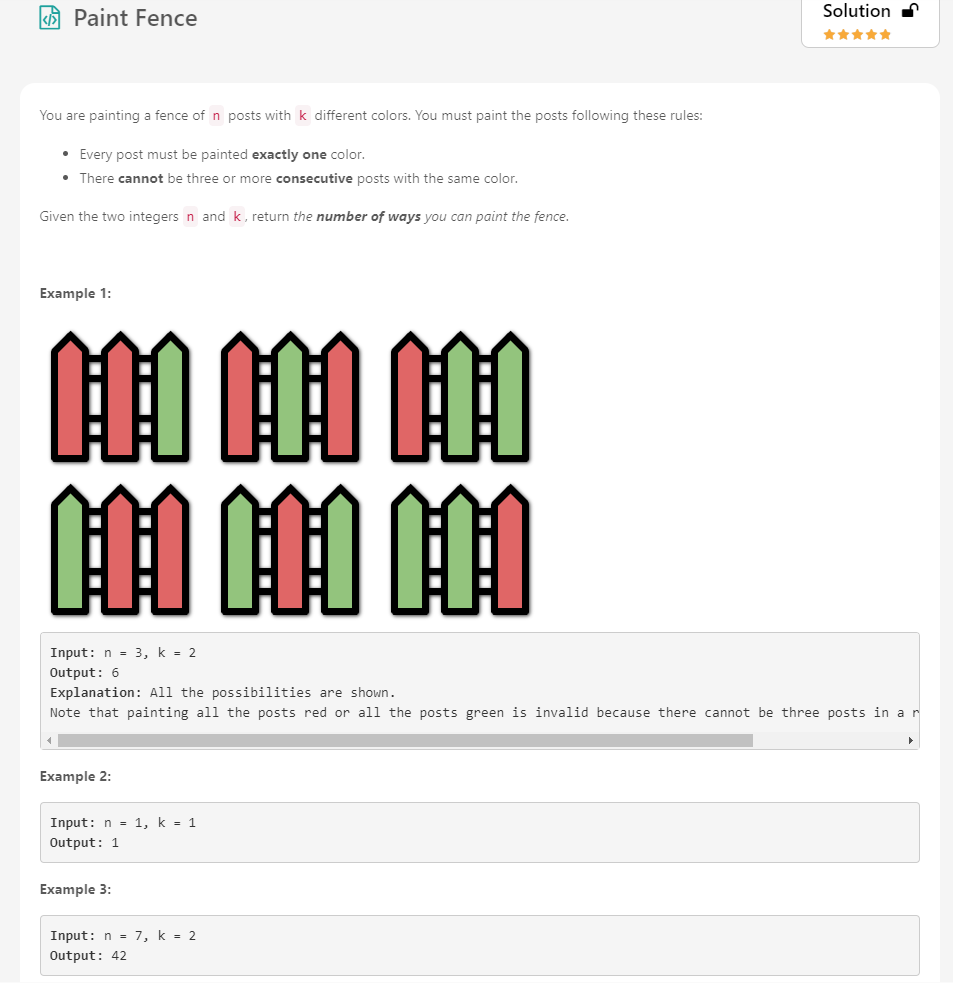

In [ ]:
# Accepted V1
class Solution:
    def numWays(self, n: int, k: int) -> int:
        num_count = [0] * (n+1)
        # The same, Not the same
        num_count[0] = (0, k)
        pre = num_count[0]
        num_count[1] = (pre[1], pre[0]*(k-1) + pre[1]*(k-1))
        for i in range(2, n+1):
            pre = num_count[i-1]
            # Pre the same, Pre not the same
            num_count[i] = (pre[1], pre[0]*(k-1) + pre[1]*(k-1))
            #print(num_count[i])
             
        return num_count[-2][0] + num_count[-2][1]

In [ ]:
"""
You can try to add a larger number. This may make it much simple.

Like:
    
    for i in range(2, n+1)

"""

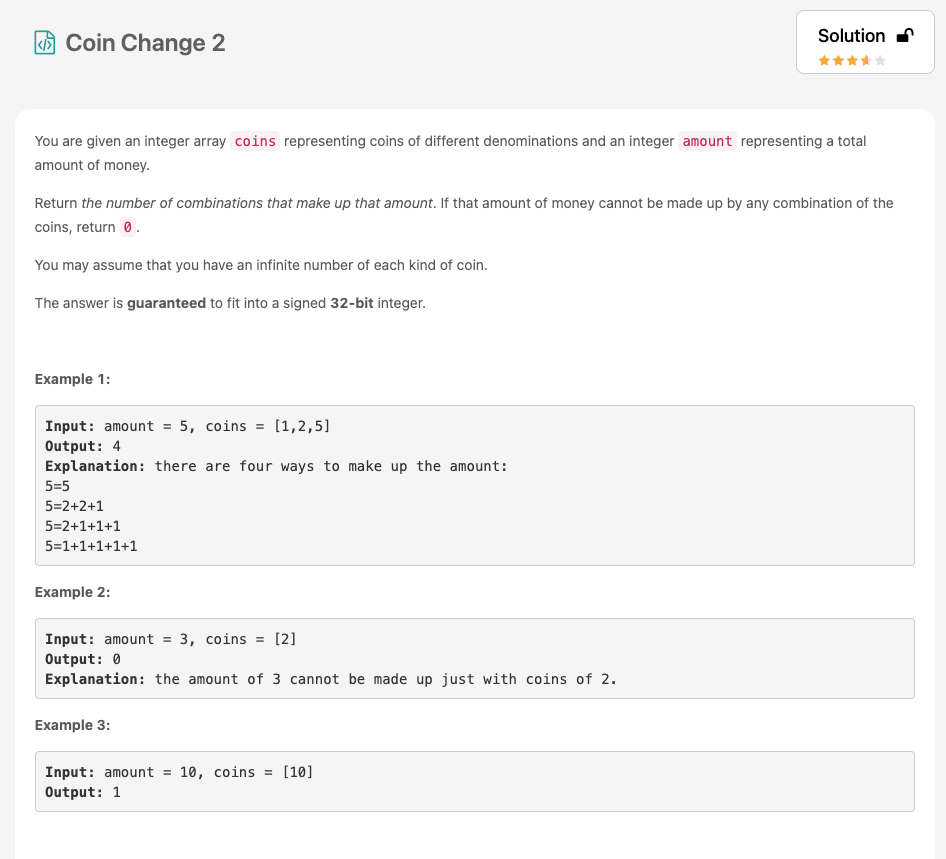

In [2]:
(1,2) + (3,4)

(1, 2, 3, 4)

In [ ]:
# Time Exceeded v1
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
 
        def dp(amount):
            if amount <0:
                return set()
            result = set()
            for x in coins:
                left = amount-x
                if left>0:
                    for z in dp(left):
                        result.add((x,) + z)
                elif left==0:
                    result.add((x,))
            return result
        
        if amount==0:
            return 1
        
        result = dp(amount)
        result = set([tuple(sorted(x)) for x in result])
        # print(result)
        return len(result)

In [ ]:
# Really Great Way -- Tring implementing later
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        dp = [0] * (amount + 1)
        dp[0] = 1
        
        for coin in coins:
            for x in range(coin, amount + 1):
                dp[x] += dp[x - coin]
        return dp[amount]           

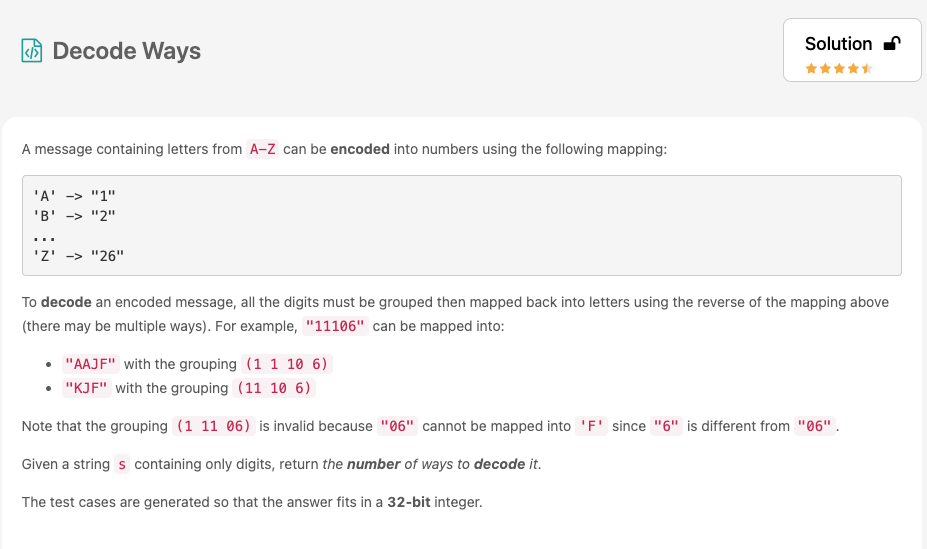

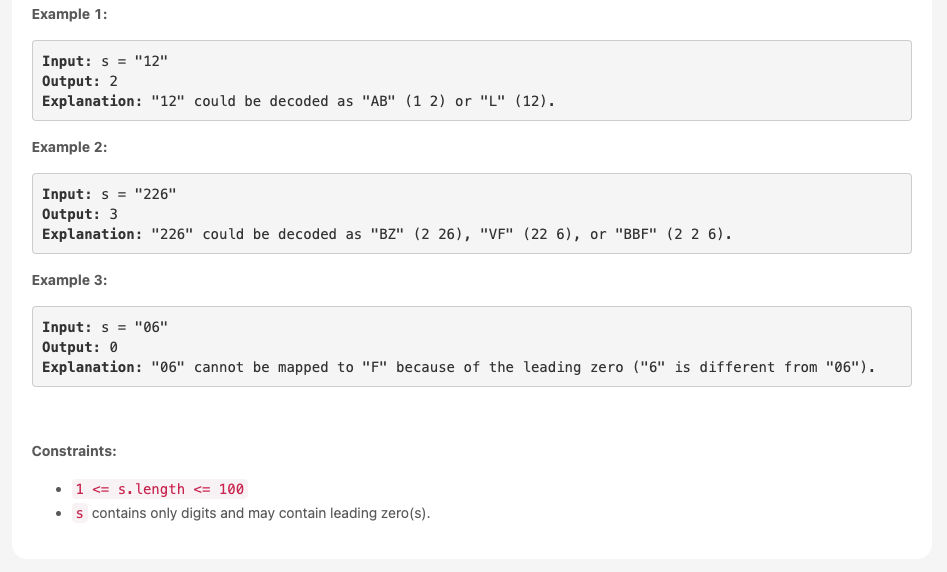

In [3]:
bool('0')

True

In [ ]:
# Accepted V1
class Solution:
    def numDecodings(self, s: str) -> int:

        @lru_cache(None)
        def dp(string):
            # Base cases
            if not string or string[0]=='0':
                return 0               
            elif len(string)==1:
                return 1
            
            num = 0
            num += dp(string[1:])
            if string[0]!='0' and int(string[:2])<=26:
                if len(string)==2:
                    num += 1
                else:
                    num += dp(string[2:])
            
            return num
        
        return dp(s)

In [ ]:
# Standard Answer
class Solution:

    @lru_cache(maxsize=None)
    def recursiveWithMemo(self, index, s) -> int:
        # If you reach the end of the string
        # Return 1 for success.
        if index == len(s):
            return 1

        # If the string starts with a zero, it can't be decoded
        if s[index] == '0':
            return 0

        if index == len(s)-1:
            return 1
        
        answer = self.recursiveWithMemo(index + 1, s)
        if int(s[index : index + 2]) <= 26:
            answer += self.recursiveWithMemo(index + 2, s)

        return answer

    def numDecodings(self, s: str) -> int:
        return self.recursiveWithMemo(0, s)

In [ ]:
# Iterative Approach
class Solution:
    def numDecodings(self, s: str) -> int:
        # Array to store the subproblem results
        dp = [0 for _ in range(len(s) + 1)]

        dp[0] = 1
        # Ways to decode a string of size 1 is 1. Unless the string is '0'.
        # '0' doesn't have a single digit decode.
        dp[1] = 0 if s[0] == '0' else 1


        for i in range(2, len(dp)):

            # Check if successful single digit decode is possible.
            if s[i - 1] != '0':
                dp[i] = dp[i - 1]

            # Check if successful two digit decode is possible.
            two_digit = int(s[i - 2 : i])
            if two_digit >= 10 and two_digit <= 26:
                dp[i] += dp[i - 2]
                
        return dp[len(s)]

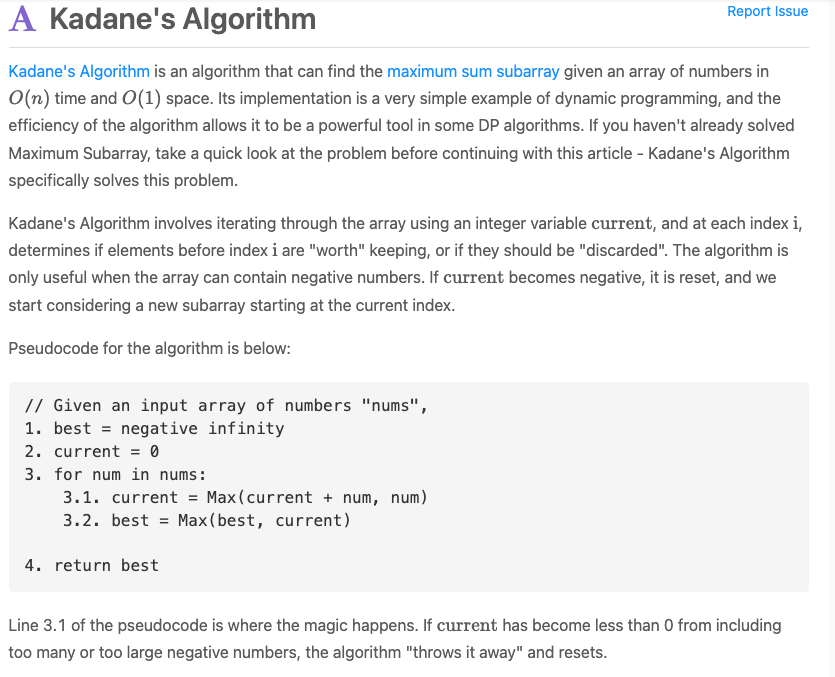

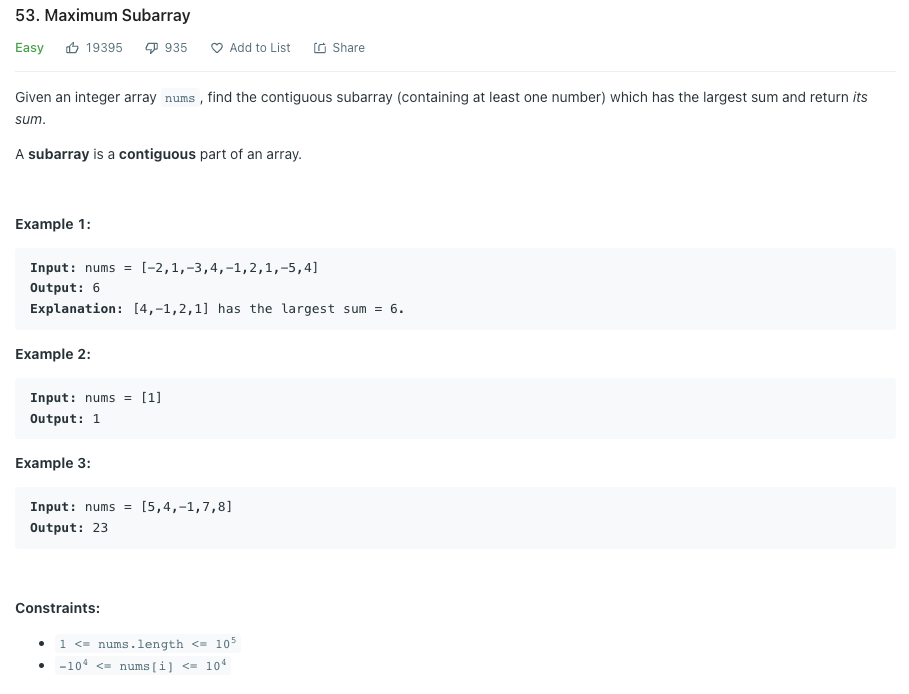

In [ ]:
# Accepted v1
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:

        if not [x for x in nums if x >=0]:
            return max(nums)
        
        dp = [0] * len(nums)
        
        for i in range(len(nums)):
            dp[i] = max(dp[i], dp[i-1]+nums[i])

        return max(dp)
    

"""
// Given an input array of numbers "nums",
1. best = negative infinity
2. current = 0
3. for num in nums:
    3.1. current = Max(current + num, num)
    3.2. best = Max(best, current)

4. return best

"""

In [ ]:
# Standard V1
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        max_subarray = -math.inf
        for i in range(len(nums)):
            current_subarray = 0
            for j in range(i, len(nums)):
                current_subarray += nums[j]
                max_subarray = max(max_subarray, current_subarray)
        
        return max_subarray

In [ ]:
# Kadane's Algorithm
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        # Initialize our variables using the first element.
        current_subarray = max_subarray = nums[0]
        
        # Start with the 2nd element since we already used the first one.
        for num in nums[1:]:
            # If current_subarray is negative, throw it away. Otherwise, keep adding to it.
            current_subarray = max(num, current_subarray + num)
            max_subarray = max(max_subarray, current_subarray)
        
        return max_subarray

In [ ]:
# Approach 3: Divide and Conquer (Advanced)
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        def findBestSubarray(nums, left, right):
            # Base case - empty array.
            if left > right:
                return -math.inf

            mid = (left + right) // 2
            curr = best_left_sum = best_right_sum = 0

            # Iterate from the middle to the beginning.
            for i in range(mid - 1, left - 1, -1):
                curr += nums[i]
                best_left_sum = max(best_left_sum, curr)

            # Reset curr and iterate from the middle to the end.
            curr = 0
            for i in range(mid + 1, right + 1):
                curr += nums[i]
                best_right_sum = max(best_right_sum, curr)

            # The best_combined_sum uses the middle element and
            # the best possible sum from each half.
            best_combined_sum = nums[mid] + best_left_sum + best_right_sum

            # Find the best subarray possible from both halves.
            left_half = findBestSubarray(nums, left, mid - 1)
            right_half = findBestSubarray(nums, mid + 1, right)

            # The largest of the 3 is the answer for any given input array.
            return max(best_combined_sum, left_half, right_half)
        
        # Our helper function is designed to solve this problem for
        # any array - so just call it using the entire input!
        return findBestSubarray(nums, 0, len(nums) - 1)
